# Extra Details for Breakout-v0
* Input is lot bigger than we're used to
* 4 frames per states
* Each frame is 210x160x3
* Grayscale 210x160
* Stacked 4x210x160 = 134,400
* Atari games are pretty simple
* Can downsample / crop without losing any information

# Let's look at a frame

In [1]:
import gym
env = gym.make('Breakout-v0')
A = env.reset()

Remember! 'env.observation_space.simple()' will only give you information random samples from the "box"

# Showing the frame

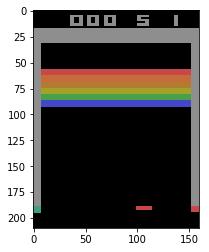

In [2]:
import matplotlib.pyplot as plt
plt.imshow(A)
plt.show()

Clearly, some parts are irrelevant
# Crop

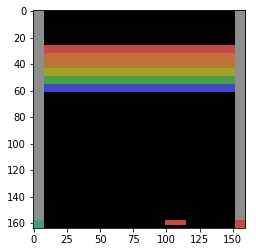

In [3]:
B = A[31:195]
plt.imshow(B)
plt.show()

# Ba downsample

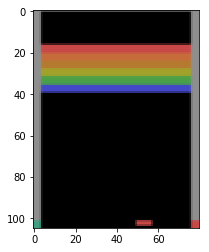

In [5]:
from scipy.misc import imresize
C = imresize(B, size=(105, 80, 3))
plt.imshow(C)
plt.show()

May be hard to see the artefacts on thi slide.
# Nearest neighbor interpretation

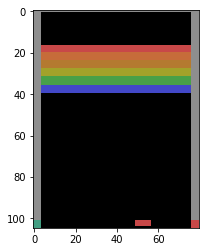

In [6]:
C = imresize(B, size= (105, 80, 3), interp= 'nearest')
plt.imshow(C)
plt.show()

# Make it a square

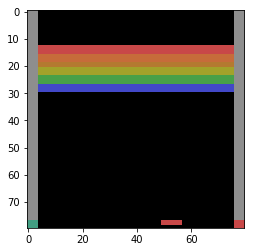

In [7]:
C = imresize(B, size =(80,80, 3), interp= 'nearest')
plt.imshow(C)
plt.show()

# Other
* Grayscale (take the mean along color axis)
* Normalize to 0-1
# Tensorflow Layers
* Recall from CNN class: in order to connect final convolution layer + first fully connected layer, we must flatten the input
* Requires us to calculate the convolution output size manually (not fun)
* Spent an entire lectore explaning how to do that
* Instead, use built-in layers
* These are also much faster
```python
tf.contrib.layers.conv2d
tf.contrib.layers.fully_connected
```
* Downside: we have less control over how the layers work
* No "params" attribute to help us make a copy
* We use a "scope" instead
* All variables we create within the scope will have the same prefix
* Will help us find the variables we need in order to make the copy
# Epsilon decay
* Decrease form 1..0.1 linearly
* Then remain at 0.1
# Hyperparameters
* if you want to know the exact hyperparametres used, consul te paper: "Playing Atari with Deep Reinforcement Learning", Mnih et al. 2013
* You are encouraged to tweak them
* Always "git pull" so you have the latest version